<a href="https://colab.research.google.com/github/AIgbine/NLP-Disaster-Classifier/blob/main/Disaster_Classification_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
import pickle
#with open('data_dtm.pkl','rb') as dtm:
#    data_dtm = pickle.load(dtm)
    
with open('corpus_nondisaster.pkl','rb') as corpus_0:
    corpus0 = pickle.load(corpus_0)
    
with open('corpus_disaster.pkl','rb') as corpus_1:
    corpus1 = pickle.load(corpus_1)
    
#with open('train_data.pkl','rb') as trn:
#   train = pickle.load(trn)

## Sentiment Analysis

Sentiment analysis is used understand the sentiments of the
consumers abound a product/service. Sentiment analysis gives
the sentiment score of a sentence/statement tending toward positive or negative.

I will be using the TextBlob library for sentiment analysis. I know this is a disater dataset, but I want to find out if there are any overall sentiments for disater tweets as compared to non-disaster tweets. The results for TextBlob are:

* Polarity = Polarity lies in the range of [-1,1] where 1 means a positive statement and -1 means a negative statement.
* Subjectivity = Subjectivity refers that mostly it is a public opinion and not factual information [0,1].

In [ ]:
from textblob import TextBlob

In [ ]:
train = pd.read_pickle('train_data.pkl')
train.head()

,id,keyword,location,text,target,tokens,words_count,text_len,unique_word_count,mean_word_length
0,1,-99,-99,deed reason earthquak may allah forgiv us,1,"[deed, reason, earthquak, may, allah, forgiv, us]",7,44,7,5.428571
1,4,-99,-99,forest fire near la rong sask canada,1,"[forest, fire, near, la, rong, sask, canada]",7,37,7,4.428571
2,5,-99,-99,resid ask shelter place notifi offic evacu she...,1,"[resid, ask, shelter, place, notifi, offic, ev...",11,88,9,7.090909
3,6,-99,-99,peopl receiv wildfir evacu order california,1,"[peopl, receiv, wildfir, evacu, order, califor...",6,54,6,8.000000
4,7,-99,-99,got sent photo rubi alaska smoke wildfir pour ...,1,"[got, sent, photo, rubi, alaska, smoke, wildfi...",9,55,9,5.222222


In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

corpus0 = pd.read_pickle('corpus0.pkl')
corpus_N = pd.DataFrame(corpus0)
corpus_N.head()

In [ ]:
train['polarity'] = train['text'].apply(pol)
train['subjectivity'] = train['text'].apply(sub)

In [ ]:
train

,id,keyword,location,text,target,tokens,words_count,text_len,unique_word_count,mean_word_length,polarity,subjectivity
0,1,-99,-99,deed reason earthquak may allah forgiv us,1,"[deed, reason, earthquak, may, allah, forgiv, us]",7,44,7,5.428571,0.0,0.0
1,4,-99,-99,forest fire near la rong sask canada,1,"[forest, fire, near, la, rong, sask, canada]",7,37,7,4.428571,0.1,0.4
2,5,-99,-99,resid ask shelter place notifi offic evacu she...,1,"[resid, ask, shelter, place, notifi, offic, ev...",11,88,9,7.090909,0.0,0.0
3,6,-99,-99,peopl receiv wildfir evacu order california,1,"[peopl, receiv, wildfir, evacu, order, califor...",6,54,6,8.000000,0.0,0.0
4,7,-99,-99,got sent photo rubi alaska smoke wildfir pour ...,1,"[got, sent, photo, rubi, alaska, smoke, wildfi...",9,55,9,5.222222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,-99,-99,two giant crane hold bridg collaps nearbi home,1,"[two, giant, crane, hold, bridg, collaps, near...",8,54,8,5.750000,0.0,1.0
7609,10870,-99,-99,aria ahrari thetawniest control wild fire cali...,1,"[aria, ahrari, thetawniest, control, wild, fir...",11,88,11,7.090909,0.1,0.4
7610,10871,-99,-99,volcano hawaii,1,"[volcano, hawaii]",2,18,2,6.500000,0.0,0.0
7611,10872,-99,-99,polic investig ebik collid car littl portug eb...,1,"[polic, investig, ebik, collid, car, littl, po...",14,113,13,7.142857,0.0,0.0


In [ ]:
string_nondisaster = " ".join([str(elem) for elem in corpus0]) 

string_nondisaster

'whats man love fruits summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cant eat shit nyc last week love girlfriend cooool like pasta end always try bring heavy metal rt crying set ablaze plus side look sky last night ablaze phdsquares mufc theyve built much hype around new acquisitions doubt set epl ablaze season ablaze lord check httptcoyduixefipe nsfw outside youre ablaze alive youre dead inside awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care us soooo pumped ablaze southridgelife wanted set chicago ablaze preaching hotel gained followers last week know stats grow building perfect tracklist life leave streets ablaze check httptcoyduixefipe nsfw first night retainers quite weird better get used wear every single night next year least santa cruz ûó head st elizabeth police superintendent lanford salmon r noches elbestia alexis_sanchez happy see teammates training hard goodnight gunners set hearts 

In [ ]:
blob0 = TextBlob(string_nondisaster)
blob0.sentiment

Sentiment(polarity=0.09874285462941514, subjectivity=0.5006983123084243)

In [ ]:
string_disaster = " ".join([str(elem) for elem in corpus1]) 

string_disaster

'deeds reason earthquake may allah forgive us forest fire near la ronge sask canada residents asked shelter place notified officers evacuation shelter place orders expected people receive wildfires evacuation orders california got sent photo ruby alaska smoke wildfires pours school rockyfire update california hwy closed directions due lake county fire cafire wildfires flood disaster heavy rain causes flash flooding streets manitou colorado springs areas im top hill see fire woods theres emergency evacuation happening building across street im afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding raining flooding florida tampabay tampa days ive lost count flood bago myanmar arrived bago damage school bus multi car crash breaking bbcmtd wholesale markets ablaze africanbaze breaking newsnigeria flag set ablaze aba inec office abia set ablaze barbados bridgetown jamaica ûò two cars set ablaze s

In [ ]:
blob1 = TextBlob(string_disaster)
blob1.sentiment

Sentiment(polarity=0.013336132190551603, subjectivity=0.43848028218652235)

In [ ]:
#Mean polarity value for Disaster and Non-disaster tweets
train.groupby(['target'])['polarity'].mean()

target
0    0.056291
1    0.011948
Name: polarity, dtype: float64

In [ ]:
#Mean subjectivity value for Disaster and Non-disaster tweets
train.groupby(['target'])['subjectivity'].mean()

target
0    0.233171
1    0.187435
Name: subjectivity, dtype: float64

This was just a trial. The mean values of polarity and sujectivity are close for disaster and non disaster tweets. 
This may be because the number of tweets are quite much and the range of values for these values are -1 to 1 for polarity or 0 to 1 for subjectivity. You can pick individual tweets and check these values from the DataFrame to take a look

In [ ]:
train.groupby(['target'])['polarity'].min()

target
0   -1.0
1   -1.0
Name: polarity, dtype: float64

In [ ]:
train.groupby(['target'])['polarity'].max()

target
0    1.0
1    1.0
Name: polarity, dtype: float64

In [ ]:
train.groupby(['target'])['subjectivity'].min()

target
0    0.0
1    0.0
Name: subjectivity, dtype: float64

In [ ]:
train.groupby(['target'])['subjectivity'].max()

target
0    1.0
1    1.0
Name: subjectivity, dtype: float64

In [ ]:
def target_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(x2, alpha=0.5,color='grey',bins=50)
    _ = plt.hist(x1, alpha=0.7,color='red',bins=50 )
    
    return _

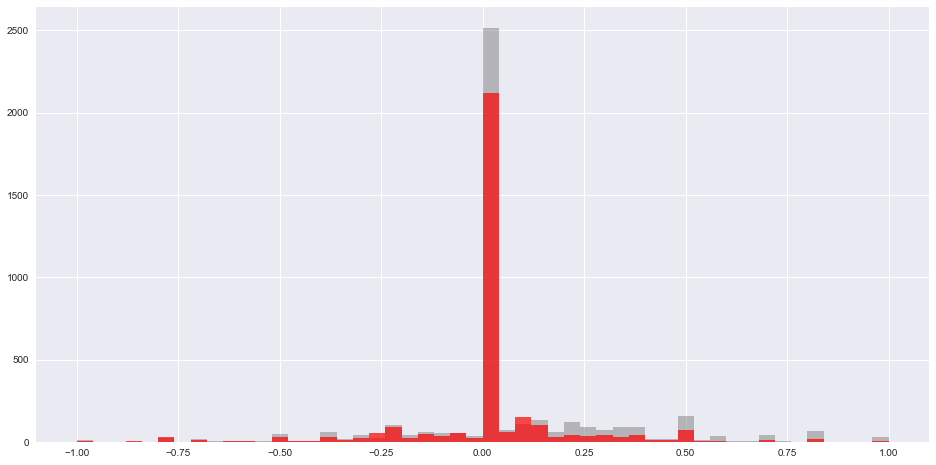

In [ ]:
_ = target_features('polarity')

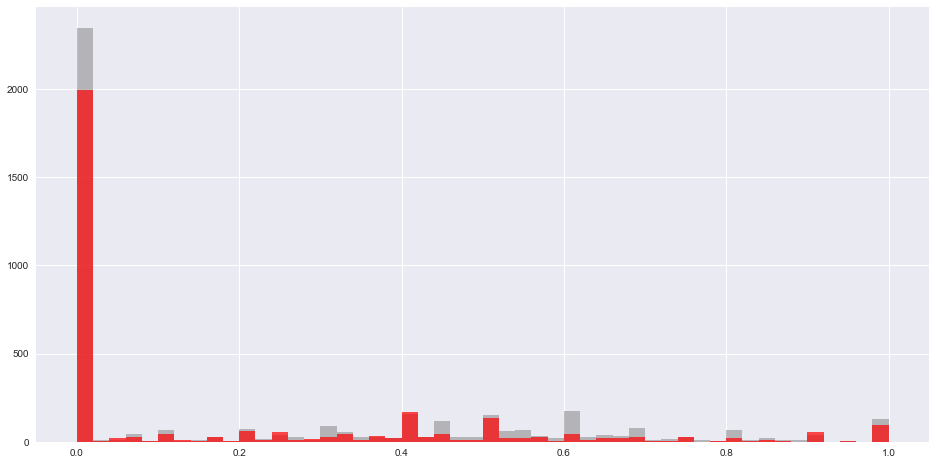

In [ ]:
#Distribution of Subjectivity
_ = target_features('subjectivity')